# Homework Assignment 1

In [249]:
import pandas as pd #first we'll need module pandas to work with the dataframes
%matplotlib inline

## Dataset 1. The 311 service requests (CSV) in Boston

The data contains all 311 call service requests, including their time, location, type of issue and many other details

Source https://data.boston.gov/dataset/311-service-requests

In [70]:
#lets specify the file location on the web
#we can actually upload the data directly from there!
#the data is provided by year, so consider the most recent full year available - 2019
fname = '311_service_requests_2020.csv'
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpxbo51van.csv'

In [71]:
boston311 = pd.read_csv(url, dtype = object) #upload the data

In [72]:
#preview the data
boston311.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101003148265,2020-01-01 00:07:00,2020-01-13 03:30:00,2020-01-20 06:43:10,OVERDUE,Closed,Case Closed. Closed date : 2020-01-20 11:43:10...,Park Lights - Doherty Playground (BPRD),Parks & Recreation Department,Park Maintenance & Safety,...,Charlestown,2,2,0207,INTERSECTION S Quincy Pl & Saint Martin St,NaN,42.38298650386987,-71.06782757458014,0101000020E6100000ADA5774957C451C01A77A6B30531...,Citizens Connect App
1,101003148266,2020-01-01 00:54:48,2020-01-01 00:54:48,2020-01-02 01:11:49,OVERDUE,Closed,Case Closed. Closed date : 2020-01-02 06:11:49...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Dorchester,8,Ward 17,1702,85 Bloomfield St,02124,42.298899539954604,-71.06954060485408,0101000020E6100000E9E56F5A73C451C07E7212574226...,Citizens Connect App
2,101003148268,2020-01-01 01:14:13,2020-01-03 03:30:00,2020-01-01 10:05:46,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 15:05:46...,Requests for Street Cleaning,Public Works Department,Street Cleaning,...,South End,6,Ward 9,0901,423 Shawmut Ave,02118,42.340129542627736,-71.07429052348337,0101000020E6100000E2300A2DC1C451C0AAFE665D892B...,Citizens Connect App
3,101003148269,2020-01-01 01:19:00,2020-01-03 03:30:00,2020-01-02 01:10:56,ONTIME,Closed,Case Closed. Closed date : 2020-01-02 06:10:56...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Roxbury,13,Ward 12,1201,6 Moreland St,02119,42.325959555093355,-71.08276057431945,0101000020E61000006A0602F34BC551C0EB78EE0AB929...,Constituent Call
4,101003148271,2020-01-01 02:02:00,2020-01-03 03:30:00,2020-01-01 02:07:17,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 07:07:17...,Missed Trash: District 1B,Public Works Department,Sanitation,...,Beacon Hill,14,Ward 5,0503,25-29 Charles St,02114,42.35691953459473,-71.06965047571467,0101000020E61000001AD6442775C451C0A731108AAF2D...,Constituent Call


### Task 1. Count the number of neighborhoods (distinct names in "neighborhood" column), and visualize the number of complaints by neighborhood as a bar plot

In [134]:
print(boston311.neighborhood.unique())
len(boston311.neighborhood.unique())

['Charlestown' 'Dorchester' 'South End' 'Roxbury' 'Beacon Hill'
 'South Boston / South Boston Waterfront' 'Jamaica Plain' 'Mission Hill'
 'Downtown / Financial District' 'Roslindale' 'Greater Mattapan'
 'East Boston' 'West Roxbury' 'Hyde Park' 'Back Bay' 'Allston / Brighton'
 'Allston' ' ' 'Boston' 'Fenway / Kenmore / Audubon Circle / Longwood'
 'South Boston' 'Brighton' 'Mattapan' nan 'Chestnut Hill']


25

In [103]:
BN=boston311.neighborhood.unique().tolist()
BN.remove(' ')#delete the space 

In [116]:
print(BN)
len(BN)

['Charlestown', 'Dorchester', 'South End', 'Roxbury', 'Beacon Hill', 'South Boston / South Boston Waterfront', 'Jamaica Plain', 'Mission Hill', 'Downtown / Financial District', 'Roslindale', 'Greater Mattapan', 'East Boston', 'West Roxbury', 'Hyde Park', 'Back Bay', 'Allston / Brighton', 'Allston', 'Boston', 'Fenway / Kenmore / Audubon Circle / Longwood', 'South Boston', 'Brighton', 'Mattapan', nan, 'Chestnut Hill']


24

In [ ]:
#BN list has a nan, so there are only 23 neighborhoods.

In [146]:
a=boston311[boston311.neighborhood==' '].index.tolist()
boston311.drop(a,inplace=True)# find which rows are ' ' in neighborhood and delete them.

<AxesSubplot:xlabel='neighborhood'>

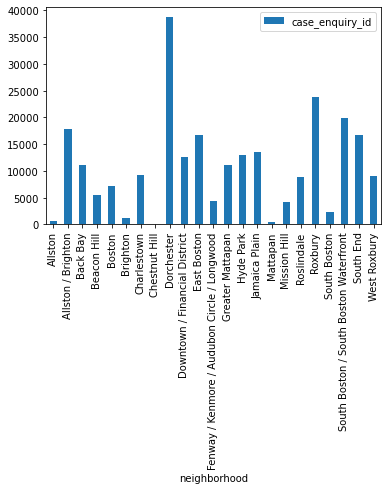

In [144]:
boston311[['neighborhood','case_enquiry_id']].groupby(by=['neighborhood']).count().plot.bar()

## Dataset 2. Real-estate data sales (XLS)

The data contains information on all the residential real estate sold in NYC, including address of the house/unit, its size, age, time of sale and of course the price

In [31]:
#the data is split by year and borough. Take Brooklyn in 2015 
year=2015; boro='brooklyn'

In [32]:
fname=str(year)+'_'+boro+'.xls'

In [33]:
url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/'+str(year)+\
                                                                                       '/'+fname
# alternative URL
# url = '2015_brooklyn.xls'

In [34]:
re_sales = pd.read_excel(url)

In [10]:
re_sales.head()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


We'll need to skip first 4 lines to make it pandas-frienly 

And also consider alternative data ingestion approach: download to the local folder first and then upload from local drive

In [35]:
import urllib #use urllib mobule for web requests
dataDir='' #local data folder to use
urllib.request.urlretrieve(url,dataDir+fname)

('2015_brooklyn.xls', <http.client.HTTPMessage at 0x1e5b0df10d0>)

In [36]:
#now upload the data, also skipping first 4 rows
re_sales = pd.read_excel(dataDir+fname,skiprows=4)

In [37]:
re_sales.head() #now the dataframe looks reasonable

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


### Task 2. 
Quantify the average price per square foot per zip code. Visualize result as a bar plot. Which zip codes are the three most expensive ones?

In [231]:
re_sales.columns

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [232]:
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).sum()

,SALE PRICE\n
ZIP CODE,
0,3425000
11201,1986984263
11203,271955412
11204,318543428
11205,538840478
11206,657478647
11207,396223004
11208,303242226
11209,437900992


In [233]:
re_sales[['ZIP CODE\n','GROSS SQUARE FEET\n']].groupby(by=['ZIP CODE\n']).sum()

,GROSS SQUARE FEET\n
ZIP CODE,
0,0
11201,2634291
11203,1763658
11204,1468675
11205,2532107
11206,1905171
11207,2927931
11208,2180869
11209,1450713


In [234]:
g=re_sales.groupby('ZIP CODE\n').agg({'SALE PRICE\n':'mean','GROSS SQUARE FEET\n':'mean'})
g['PRICE PER SQUARE FEET\n']=g['SALE PRICE\n']/g['GROSS SQUARE FEET\n']

In [235]:
print(g)
g.columns

            SALE PRICE\n  GROSS SQUARE FEET\n  PRICE PER SQUARE FEET\n
ZIP CODE\n                                                            
0           4.892857e+05             0.000000                      inf
11201       1.618065e+06          2145.188111               754.276677
11203       4.190376e+05          2717.500770               154.199631
11204       4.908219e+05          2262.981510               216.891707
11205       7.062129e+05          3318.619921               212.803202
11206       1.213060e+06          3515.075646               345.102170
11207       4.006299e+05          2960.496461               135.325253
11208       3.979557e+05          2862.032808               139.046511
11209       5.333751e+05          1767.007308               301.852256
11210       6.411172e+05          3032.879208               211.388966
11211       1.272336e+06          3170.145506               401.349488
11212       7.217267e+05          6351.798054               113.625580
11213 

Index(['SALE PRICE\n', 'GROSS SQUARE FEET\n', 'PRICE PER SQUARE FEET\n'], dtype='object')

In [258]:
g=g.reset_index()
g=g.drop(0,axis='rows')#no zip code neamed 0, so delete it.

<AxesSubplot:xlabel='ZIP CODE\n'>

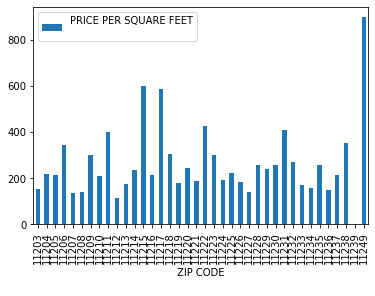

In [259]:
g[['ZIP CODE\n','PRICE PER SQUARE FEET\n']].groupby(by='ZIP CODE\n').mean().plot.bar()

In [9]:
#gain the bar plot and know the three most expensive areas' zip code are 11249, 11201, 11215

Hints: First, use "group_by" to create an aggregate with cumulative price and sq foot size and then add a new field through assignment dividing one by the other. 

You can use sort_values to order dataframe by price per zip code and see the top three zip codes.

Not mandatory, but if you want python to give you a specific list of the top three zip codes, you can use .iloc to slice it and get the index converting it to a list. But then make sure to ignore zip codes with infinite prices (likely due to zero house sizes).

## Dataset 3. Street Pavement Rating

The New York City Department of Transportation is responsible for keeping the City's streets in good repair. The Agency performs ongoing assessment of New York City streets. Ratings are based on a scale from 1 to 10, and results are grouped in the following categories: Good (%) - ratings of 8 to 10, Fair (%) - ratings of 4 to 7, and Poor (%) - ratings of 1 to 3. Rating dates started from 1994 to 2019. This data will allow you to create a map.

GeoJSON is a JSON based format designed to represent the geographical features with their non-spatial attributes. Besides GeoJSON, shapefile is also a common format for geographical datasets. For more information, please check https://geojson.org/.

As JSON contains spatial information (in this case shapes of the streets) along with the data, we'll need a slightly different vehicle to load it. There is a module geopandas which we'll use below. In short its just like pandas, but having a special column "geometry" which is meant to contain spatial info

In [148]:
import geopandas as gpd
url = 'https://data.cityofnewyork.us/api/geospatial/2cav-chmn?method=export&format=GeoJSON'
# alternative URL
# url = 'https://github.com/CUSP2020PUI/Data/raw/master/Street%20Pavement%20Rating.geojson'
rating = gpd.read_file(url)

In [149]:
rating.shape #shape of the dataframe - first is the number of records (streets)

(81209, 13)

In [150]:
rating.head() #lets preview the data

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date,geometry
0,0,0,969,609.854259468,0,5,L,2020,589.0,33.08,FAIR,2020-01-24,"MULTILINESTRING ((-74.21215 40.51645, -74.2119..."
1,0,0,983,257.932161624,0,9,NaN,2020,258.0,30.0,GOOD,2021-05-20,"MULTILINESTRING ((-74.20972 40.51892, -74.2106..."
2,0,0,999,379.637985455,0,3,NaN,2020,232.0,30.0,POOR,2019-10-01,"MULTILINESTRING ((-74.20649 40.51486, -74.2054..."
3,0,0,1018,50.2891638427,0,8,L,2020,75.0,34.58,GOOD,2019-10-01,"MULTILINESTRING ((-74.20882 40.51931, -74.2087..."
4,0,0,1050,786.400025432,0,5,NaN,2020,891.0,30.0,FAIR,2020-01-13,"MULTILINESTRING ((-74.20584 40.51791, -74.2047..."


### Task 3.
Visualize only the poorly maintained roads so we can zoom into those that need particular attention.

HINT: Filter the dataframe first using slicing by an appropriate condition on rating.rating_word

In [153]:
rating.iloc[:,:-1].describe()

C:\Users\14367\AppData\Local\Temp\ipykernel_8756\2776315433.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rating.iloc[:,:-1].describe()


,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date
count,81209,81209,81209,81209,81209,81209,57698,81209,81209,81209,81209,73032
unique,2,2,81209,41590,2,11,3,31,1588,834,4,2106
top,0,0,969,260.499520153,0,8,L,2021,246.0,30.0,GOOD,2021-08-12 00:00:00
freq,71660,68374,1,359,73352,25137,40816,24035,846,26402,46857,542
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-11 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-16 00:00:00


In [154]:
rating['rating_word'].value_counts()

GOOD    46857
FAIR    24893
NR       8177
POOR     1282
Name: rating_word, dtype: int64

<AxesSubplot:>

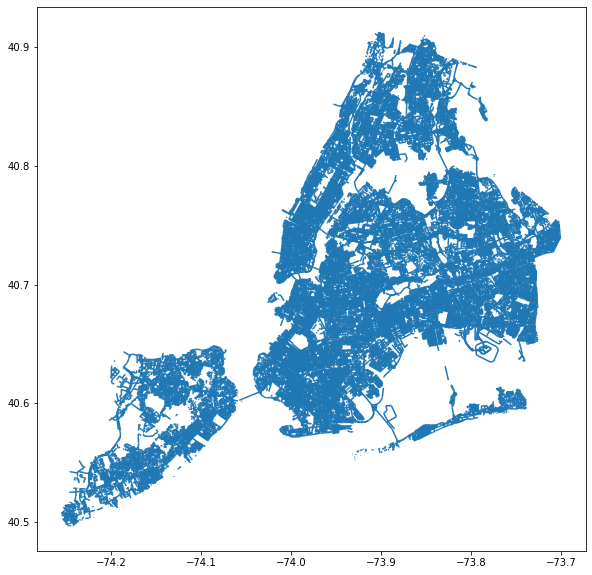

In [155]:
rating.plot(column=None, figsize=(10,10))

<AxesSubplot:>

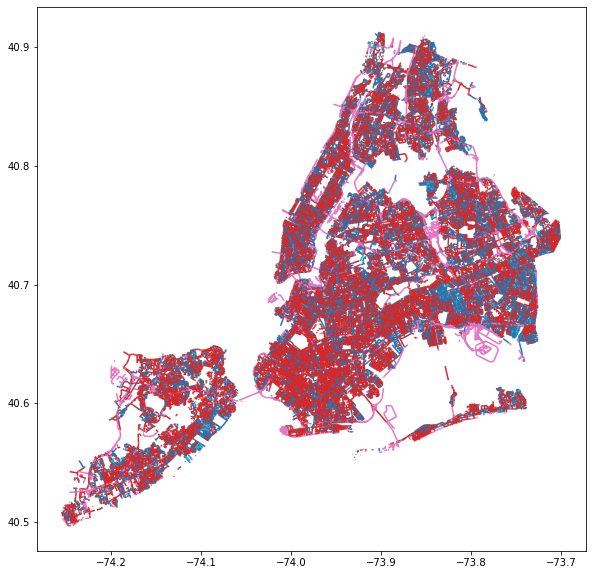

In [159]:
rating.plot('rating_word', figsize=(10,10))

<AxesSubplot:>

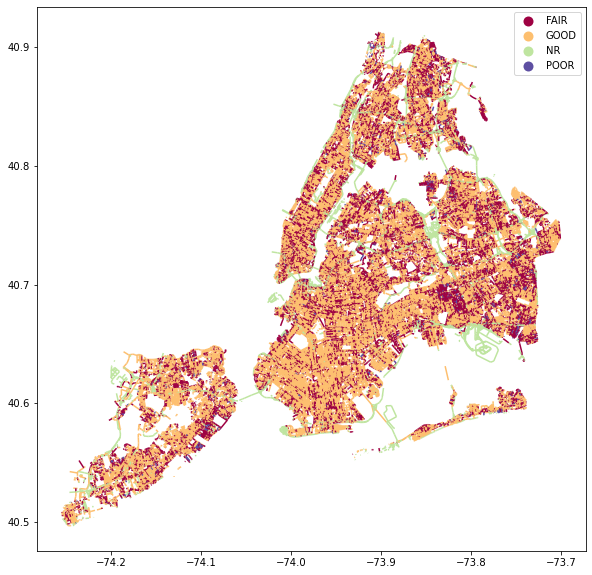

In [163]:
rating.plot('rating_word',cmap='Spectral',figsize=(10,10),legend=True)

<AxesSubplot:>

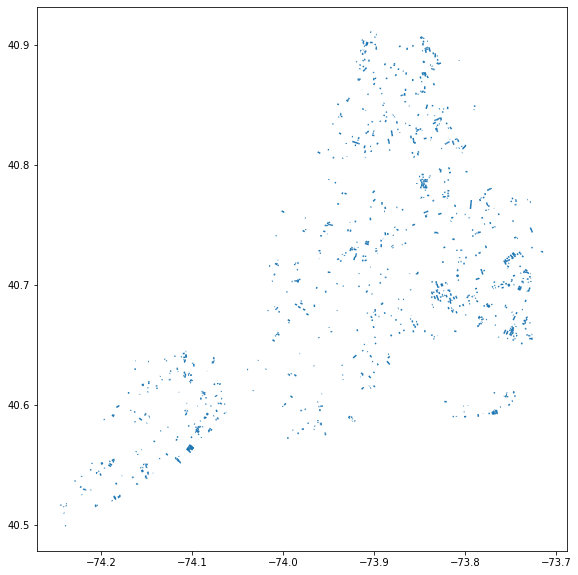

In [164]:
rating[rating.rating_word=='POOR'].plot('rating_word', figsize=(10,10))

<AxesSubplot:>

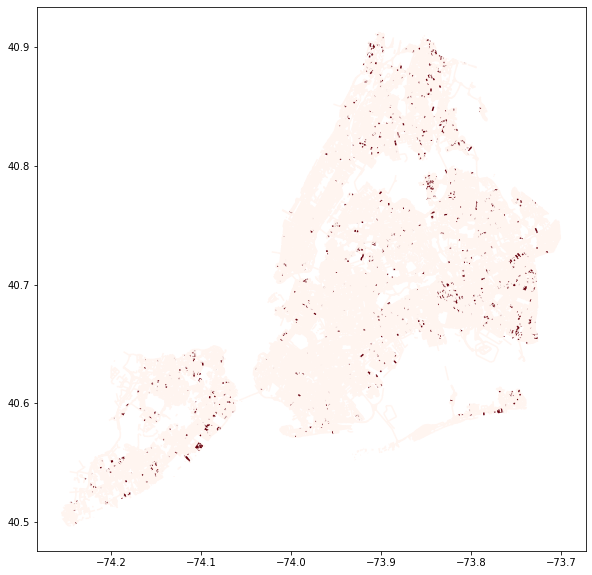

In [188]:
rating.plot(rating.rating_word=='POOR', cmap='Reds',figsize=(10,10))

### Dataset 4. COVID-19 Data by ZIP Code

This dataset includes confirmed case rates, case counts, death rates, death counts, and the percent of people tested with a positive result since March. Follwing download links refer to the dataset uploaded on Sep 1st. Dataset is provided by NYC health, please check https://www1.nyc.gov/site/doh/covid/covid-19-data.page for more information and other COVID19 related datasets.

### Task 4: 
    
    a) Aggregate dataset by Borough, calculate total cases amount in each Borough, and then visualize as a barplot
    
    b) Calculate borough-wise positive case percentage within all the tests administered within the borough (positivity rate among the tests), visualize as a barplot 
    
    c) Calculate borough-wise positive case percentage within the borough population (%% of population tested positive), and visualize as barplot. 
    
    Notice that both quantities b) and c) matter as otherwise the percentage of people tested positive might depend on the testing availability and practice which are not necessary consistent accross boroughs.


Hint: The column for case amount is “COVID_CASE_COUNT". Try groupby function in pandas to get total cases and tests by borough. Positive case percentage is ‘100*COVID_CASE_COUNT'/'TOTAL_COVID_TESTS'. To calculate positive case percentage, you might first need a borough level dataframe.

In [242]:
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/7953c97d1e58bbed9934ea04affb12ca74d9c0fb/data-by-modzcta.csv'
df = pd.read_csv(url)

In [243]:
df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,441,1871.58,23563.03,26,110.34,6.50,6786
1,10002,Chinatown/Lower East Side,Manhattan,1335,1739.29,76755.41,161,209.76,7.66,17439
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,543,1009.26,53801.62,35,65.05,3.53,15381
3,10004,Financial District,Manhattan,40,1095.71,3650.61,1,27.39,4.84,827
4,10005,Financial District,Manhattan,96,1143.39,8396.11,2,23.82,4.53,2117


<AxesSubplot:xlabel='BOROUGH_GROUP'>

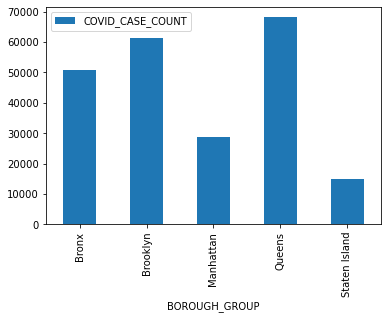

In [244]:
# a)
df[['BOROUGH_GROUP','COVID_CASE_COUNT']].groupby(by='BOROUGH_GROUP').sum().plot.bar()

In [260]:
# b)
A=df.groupby('BOROUGH_GROUP').agg({'COVID_CASE_COUNT':'sum','TOTAL_COVID_TESTS':'sum'})
A['POSITIVE_RATE_TESTS']=A['COVID_CASE_COUNT']/A['TOTAL_COVID_TESTS']

<AxesSubplot:xlabel='BOROUGH_GROUP'>

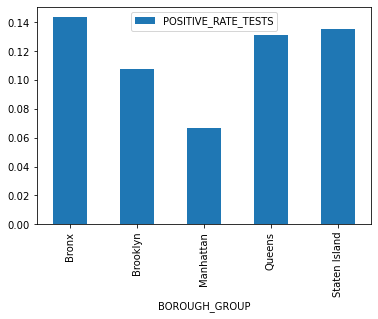

In [261]:
A=A.reset_index()
A[['BOROUGH_GROUP','POSITIVE_RATE_TESTS']].groupby(by='BOROUGH_GROUP').mean().plot.bar()

In [267]:
# c)
B=df.groupby('BOROUGH_GROUP').agg({'COVID_CASE_COUNT':'sum','POP_DENOMINATOR':'sum'})
B['POSITIVE_RATE_POPULATION']=B['COVID_CASE_COUNT']/B['POP_DENOMINATOR']

<AxesSubplot:xlabel='BOROUGH_GROUP'>

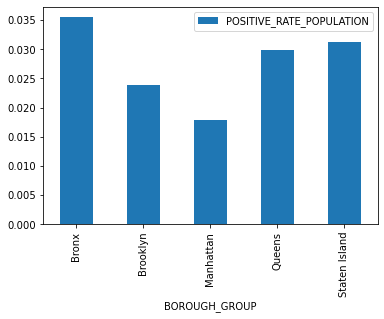

In [268]:
B=B.reset_index()
B[['BOROUGH_GROUP','POSITIVE_RATE_POPULATION']].groupby(by='BOROUGH_GROUP').mean().plot.bar()